In [65]:
import numpy as np 
from numpy.random import default_rng
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl 
import math
import random
from scipy.stats import multivariate_normal
import matplotlib.patches as mpatches
from sklearn.metrics import confusion_matrix
import seaborn as sns
import string
from itertools import cycle

In [66]:
def plot_decision_matrix(data, save_path=r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\decision_matrix.png'):
    '''
    Plots a heatmap of the decision matrix along with the values.
    Parameters
    ----------
    data: pandas.DataFrame
        Contains the sample data

    Returns
    -------
    None
    '''
    pred = data['ERM Classification'].tolist()
    act  = data.index.tolist()
    class_labels = data.sort_index().index.unique().tolist()
    print(class_labels)

    confusion = confusion_matrix(act, pred, normalize='true')
    print(confusion)
    sns.heatmap(data=confusion,cmap="YlOrRd",annot=True, xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Decision')
    plt.ylabel('True Class Label')
    positions = range(0,len(class_labels))
    plt.xticks(positions, class_labels)
    plt.yticks(positions, class_labels)
    # plt.tight_layout()
    plt.savefig(save_path)
    # plt.clf()
    # plt.close()

In [67]:
def plot_correct_classified(data, subset=['x','y','z']):
    '''
    Plots the four-dimensions of the samples taken from the distribution and if the classification was correct.

    Parameters
    ----------
    samples_path: string
        File containing the sample data

    Returns
    -------
    None
    '''
    markers = ['o', '^', 's', 'p', '*', '+', '.', ',', 'v', '<', '>', '1', '2', '3', '4', '8', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
    fig = plt.figure(figsize = (5.5,5))
    fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
    ax = plt.axes(projection ="3d")
    # Plot correct
    correct = data[data['Correct']==True]
    true_labels = correct.sort_index().index.unique().tolist()
    # print('Number of correct classified points: %d'%correct.shape[0])
    for i, true_label in enumerate(true_labels):
        temp = correct.loc[true_label, :]
        xs = temp[subset[0]].tolist()
        ys = temp[subset[1]].tolist()
        zs = temp[subset[2]].tolist()
        ax.scatter3D(xs, ys, zs, label=true_label, marker=next(iter(markers)), alpha=0.3, color='green')
    # Plot incorrect
    correct = data[data['Correct']==False]
    true_labels = correct.sort_index().index.unique().tolist()
    # print('Number of incorrect classified points: %d'%correct.shape[0])
    for i, true_label in enumerate(true_labels):
        temp = correct.loc[true_label, :]
        xs = temp[subset[0]].tolist()
        ys = temp[subset[1]].tolist()
        zs = temp[subset[2]].tolist()
        ax.scatter3D(xs, ys, zs, label=true_label, marker=markers[i], alpha=0.3, color='red')
    ax.set_xlabel('%s'%subset[0])
    ax.set_ylabel('%s'%subset[1])
    ax.set_zlabel('%s'%subset[2])
    #ax.get_legend().remove()
    green_patch = mpatches.Patch(color='green', label='Correct')
    red_patch = mpatches.Patch(color='red', label='Incorrect')
    ax.legend(handles=[green_patch, red_patch], loc='upper left', title='Classification')
    plt.savefig('./%s_%s_%s_true_class_classified_loss2.png'%(subset[0], subset[1], subset[2]))
    # plt.clf()
    return None


In [68]:
def plot_subset(data, subset=['x','y','z']):
    '''
    Plots the four-dimensions of the samples taken from the distribution.

    Parameters
    ----------
    data: pandas.DataFrame
        Contains the sample data
    subset: array, optional
        Plots these three values.

    Returns
    -------
    None
    '''
    # markers = ['v', '^', '<', '>', '8', 's', 'p', '*', 'h', '+', 'x', 'D','a','s','?']
    markers = ['o', '^', 's', 'p', '*', '+', '.', ',', 'v', '<', '>', '1', '2', '3', '4', '8', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

    fig = plt.figure(figsize = (5.5,5))
    fig.subplots_adjust(left=0.01, right=0.96, top=0.99, bottom=0.01, wspace=0)
    ax = plt.axes(projection ="3d")
    true_labels = data.sort_index().index.unique().tolist()
    for i, true_label in enumerate(true_labels):
        temp = data.loc[true_label, :]
        xs = temp[subset[0]].tolist()
        ys = temp[subset[1]].tolist()
        zs = temp[subset[2]].tolist()
        ax.scatter3D(xs, ys, zs, label=true_label, marker=next(iter(markers)), alpha=0.3)
    ax.set_xlabel('%s'%subset[0])
    ax.set_ylabel('%s'%subset[1])
    ax.set_zlabel('%s'%subset[2])
    ax.legend(loc='upper left', title='Class Label')
    #plt.tight_layout()
    plt.savefig('./%s_%s_%s_true_classes.png'%(subset[0], subset[1], subset[2]))
    # plt.clf()
    return None

In [69]:
def estimate_cov_mu(data):
    '''
    Estimates the covariance matrix and mean vector for all the true class
    labels in the input data.

    Parameters
    ----------
    data: pandas.DataFrame
        Given data set

    Returns
    -------
    data_info: pandas.DataFrame
        The true labels, covariance matrics and mean vectors
    '''
    true_labels = data.index.unique().tolist()
    data_info   = pd.DataFrame(columns=['True Class Label', 'Covariance Matrix', 'Mean Vector', 'Number of Samples', 'Class Prior'])
    total_samples = 0
    for true_label in true_labels:
        temp = data.loc[true_label, :]
        cov = np.cov(temp, bias=True)
        
        # temp = temp.to_frame().T  # Convert to DataFrame if temp is a Series
        
        cov  = temp.cov().to_numpy()
        mean = temp.mean(axis=0).tolist()
        n = temp.shape[0]
        total_samples = total_samples + n
        d = {'True Class Label': true_label, 'Covariance Matrix': cov, 'Mean Vector': mean, 'Number of Samples': n}
        
        # Create a DataFrame from the dictionary
        new_row = pd.DataFrame([d])

        # Concatenate it with the existing DataFrame
        data_info = pd.concat([data_info, new_row], ignore_index=True)
        # data_info = data_info.append(d, ignore_index=True)

        
    data_info['Class Prior'] = data_info['Number of Samples'] / total_samples
    return data_info

In [70]:
def risk(i , x , loss_matrix, data_info):
    '''
    Parameters
    ----------
    data_info: pandas.DataFrame
        Info on true classes in distributions.
    i: int
        The true class assigned to i
    x: 
    p: float32
        The class prior
    loss_matrix: array, optional

    '''
    risk = 0
    for j, row in data_info.iterrows():
        #  Probability, mu, sigma^2
        try:
            #print(x)
            risk = risk + loss_matrix[i][int(row['True Class Label'])-1]*row['Class Prior']*multivariate_normal.pdf(x,row['Mean Vector'],row['Covariance Matrix'])
            # print(risk)
        except np.linalg.LinAlgError:
            continue
    return risk

In [71]:
def make_decisions(data, data_info, loss_matrix=None):
    '''
    Implement classifier and check if correct given the true 
    data dsitribution knowledge. Chooses minimum risk.

    Parameters
    ----------
    data: pandas.DataFrame
        Contains the sample data
    data_info: pandas.DataFrame
    loss_matrix: array
        2d array = lambda

    Returns
    -------
    data: pandas.DataFrame
        modified data with classification and accuracy info.
    '''

    # print("Unique indices (class labels) in the data:", data.index.unique())
    choices  = []
    correct = []
    dimension_labels = data.columns.tolist()
    class_labels     = data.sort_index().index.unique().tolist()
    # Create 0-1 loss matrix if none is given
    if(loss_matrix==None):
        d = max(class_labels)
        loss_matrix = np.zeros((d,d))
        for i in range(0,d):
            for j in range(0,d):
                if(i==j):
                    loss_matrix[i][j] = 0
                else:
                    loss_matrix[i][j] = 1
    # print(loss_matrix)
    labels_reference  = {i:class_labels[i] for i in range(0,len(class_labels))}
    for idx, row in data.iterrows():
        # Modify class label for computation
        distribution = int(row.name)
        rows         = [row[dimension_label] for dimension_label in dimension_labels]
        #print(rows)
        # print(class_labels)
        args         = [risk(class_label-1, rows, loss_matrix, data_info) for class_label in class_labels]
        choice = labels_reference[np.argmin(args)]
        choices.append(choice)
        # print('Choice: %d'%choice)
        # print('Correct: %d'%distribution)
        # Check if classification was correct or not
        if(choice==distribution):
            correct.append(True)
            # print('Correct!: %d'%len(correct))
        else:
            correct.append(False)
    data['ERM Classification'] = choices
    data['Correct']            = correct
    return data

             aa        ab        ac        Yh        Yi        Yj  \
Index                                                               
5      0.257178 -0.023285 -0.014654  0.271151 -0.720009  0.276801   
5      0.286027 -0.013163 -0.119083  0.920593 -0.698091  0.281343   
5      0.275485 -0.026050 -0.118152  0.145068 -0.702771  0.280083   
5      0.270298 -0.032614 -0.117520  0.296407 -0.698954  0.284114   
5      0.274833 -0.027848 -0.129527 -0.118545 -0.692245  0.290722   
...         ...       ...       ...       ...       ...       ...   
2      0.299665 -0.057193 -0.181233 -0.425619 -0.791883  0.238604   
2      0.273853 -0.007749 -0.147468  0.400219 -0.771840  0.252676   
2      0.273387 -0.017011 -0.045022  0.701169 -0.779133  0.249145   
2      0.289654 -0.018843 -0.158281 -0.589479 -0.785181  0.246432   
2      0.351503 -0.012423 -0.203867 -0.616956 -0.783267  0.246809   

       ERM Classification  Correct  
Index                               
5                       5   

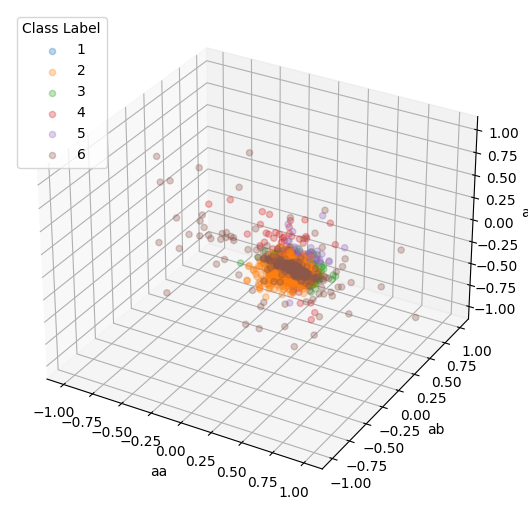

In [72]:
x_test = r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt'
y_test = r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt'
x_train = r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt'
y_train = r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt'
# data = pd.read_csv(y_train, delim_whitespace=True, header=None)
# print(data)


letters = []
for letter_a in string.ascii_letters:
        for letter_b in string.ascii_letters[:11]:
            letters.append(letter_a+letter_b)

letters = letters[:561]  #features 561
# print(len(letters))

test_id = pd.read_csv(y_test, names=['Index'])
test_df = pd.read_csv(x_test, delim_whitespace=True, names=letters)
test_df = test_df.set_index(keys=test_id['Index'], drop=True)
# print(test_df)

train_id = pd.read_csv(y_train, names=['Index'])
train_df = pd.read_csv(x_train, delim_whitespace=True, names=letters)
train_df = train_df.set_index(keys=train_id['Index'], drop=True)
# print(train_df)

activity_df = pd.concat([test_df, train_df])
# print(activity_df)

activity_df = activity_df.loc[:, ['aa','ab','ac','Yh', 'Yi', 'Yj']]
# print(activity_df)

data_info = estimate_cov_mu(data=activity_df)
# print(data_info)

plot_subset(data=activity_df, subset=['aa', 'ab', 'ac'])
# plot_subset(data=activity_df, subset=['Yh', 'Yi', 'Yj'])


activity_df = make_decisions(data=activity_df, data_info=data_info)
print(activity_df)

activity_df.to_csv(r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\activity_data.csv')
# write_sample_data(activity_df, r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\activity_data.csv')


# plot_correct_classified(data=activity_df, subset=['aa', 'ab', 'ac'])
# plot_correct_classified(data=activity_df, subset=['Yh', 'Yi', 'Yj'])
# plot_decision_matrix(data=activity_df, save_path=r'C:\Users\anifa\Desktop\GITB\Ml-course\Assignment_1\Probelm_3\activity_decision_matrix.png')